<a href="https://colab.research.google.com/github/yukthapriya/HealthCare-Monitoring-and-disease-prediction-system/blob/main/Public_Healthcare_Monitoring_and_disease_prediction_system1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing essential libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the dataset
df = pd.read_csv('dia-data.csv')
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,outcome
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no,0.0


In [6]:

df_copy = df.copy(deep=True)
df_copy[['Smoking','BPLevel','Stress','Pregancies','BMI']] = df_copy[['Smoking','BPLevel','Stress','Pregancies','BMI']].replace(0,np.NaN)


In [7]:
# Print No. of rows and columns
print(f'Total Rows {df_copy.shape[0]}')
print(f'Total Rows {df_copy.shape[1]}')

Total Rows 952
Total Rows 19


In [8]:
columns_with_na=[features for features in df_copy.columns if df_copy[features].isnull().sum()>0]

for feature in columns_with_na:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4),  ' % missing values')

BMI 0.0042  % missing values
Pregancies 0.8361  % missing values
Pdiabetes 0.0011  % missing values
Diabetic 0.0011  % missing values
outcome 0.6218  % missing values


In [11]:
num_data = [features for features in df_copy.columns if df_copy[features].dtypes != 'O']
print(f'Number of numerical columns is {len(num_data)}')

df_copy[num_data].head()

Number of numerical columns is 5


,BMI,Sleep,SoundSleep,Pregancies,outcome
0,39.0,8,6,NaN,0.0
1,28.0,8,6,NaN,0.0
2,24.0,6,6,NaN,0.0
3,23.0,8,6,NaN,0.0
4,27.0,8,8,NaN,0.0


In [12]:
discrete_columns = [feature for feature in df_copy.columns if len(df_copy[feature].unique()) < 20 and feature not in ['outcome'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(df_copy[i].unique())} discrete values')

df_copy[discrete_columns].head()

Number of discrete Columns is 17
Age has 4 discrete values
Gender has 2 discrete values
Family_Diabetes has 2 discrete values
highBP has 2 discrete values
PhysicallyActive has 4 discrete values
Smoking has 2 discrete values
Alcohol has 2 discrete values
Sleep has 8 discrete values
SoundSleep has 12 discrete values
RegularMedicine has 3 discrete values
JunkFood has 4 discrete values
Stress has 4 discrete values
BPLevel has 6 discrete values
Pregancies has 5 discrete values
Pdiabetes has 6 discrete values
UriationFreq has 3 discrete values
Diabetic has 4 discrete values


,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,no,no,8,6,no,occasionally,sometimes,high,NaN,0,not much,no
1,50-59,Male,no,yes,less than half an hr,no,no,8,6,yes,very often,sometimes,normal,NaN,0,not much,no
2,40-49,Male,no,no,one hr or more,no,no,6,6,no,occasionally,sometimes,normal,NaN,0,not much,no
3,50-59,Male,no,no,one hr or more,no,no,8,6,no,occasionally,sometimes,normal,NaN,0,not much,no
4,40-49,Male,no,no,less than half an hr,no,no,8,8,no,occasionally,sometimes,normal,NaN,0,not much,no


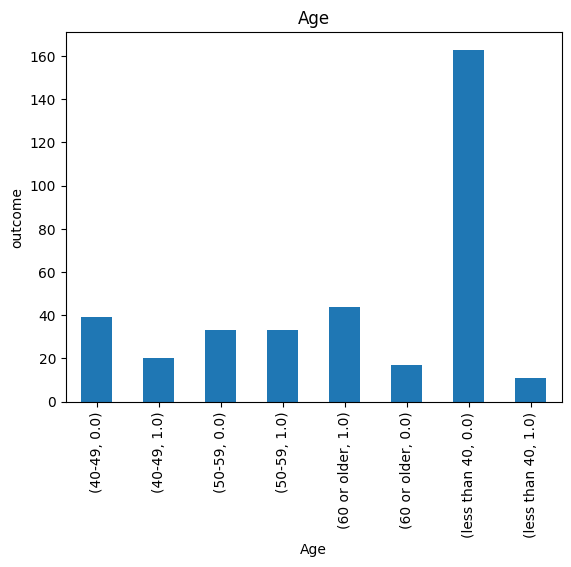

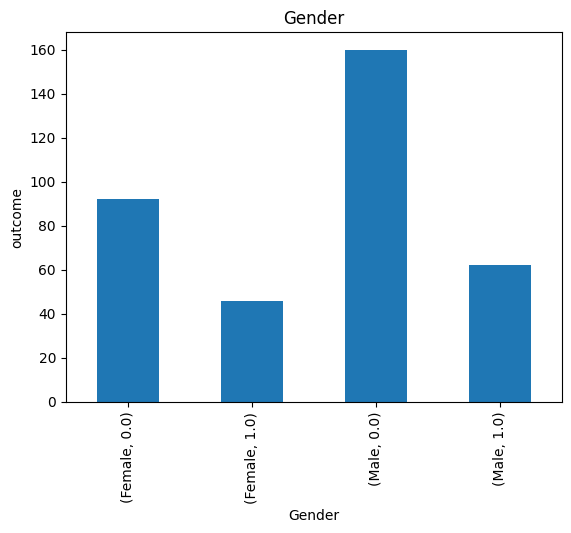

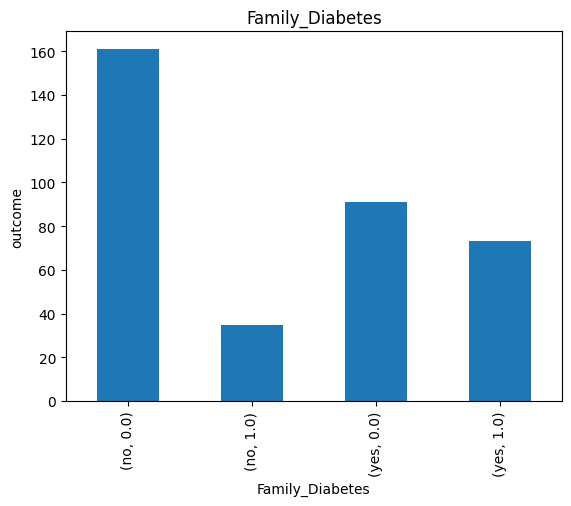

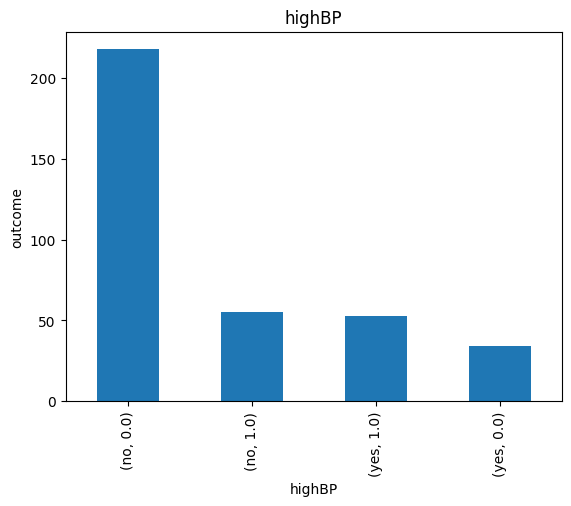

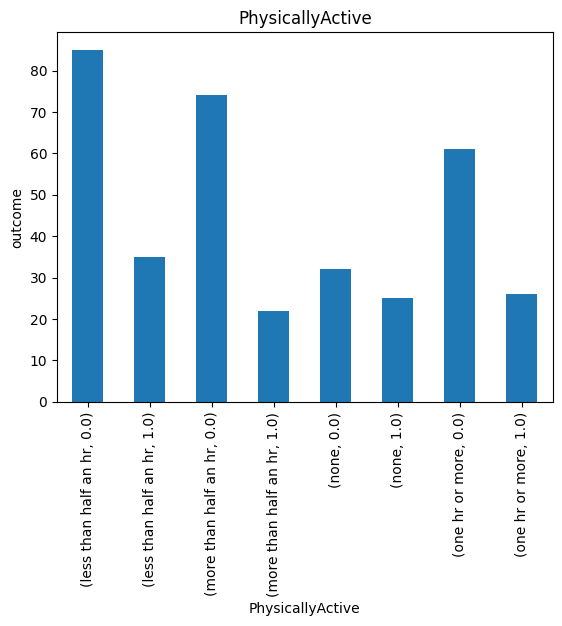

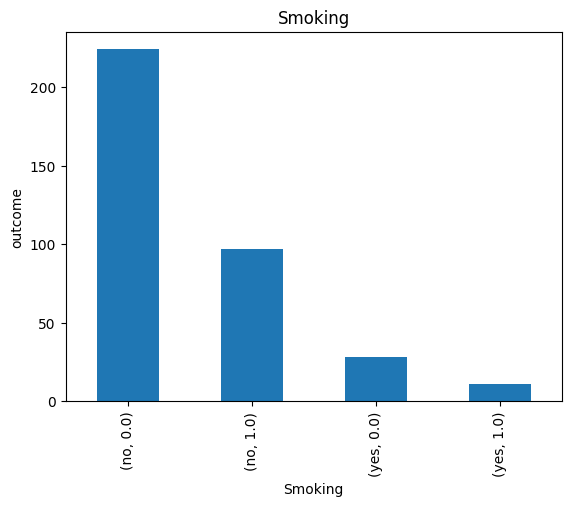

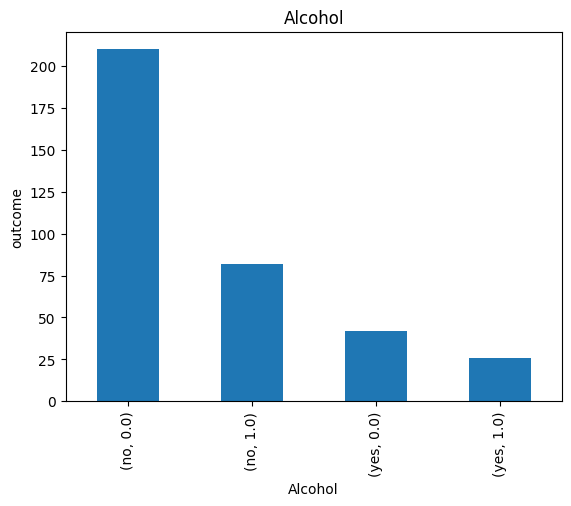

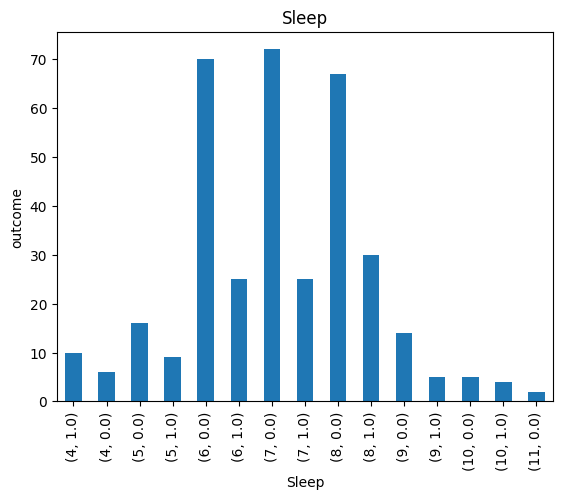

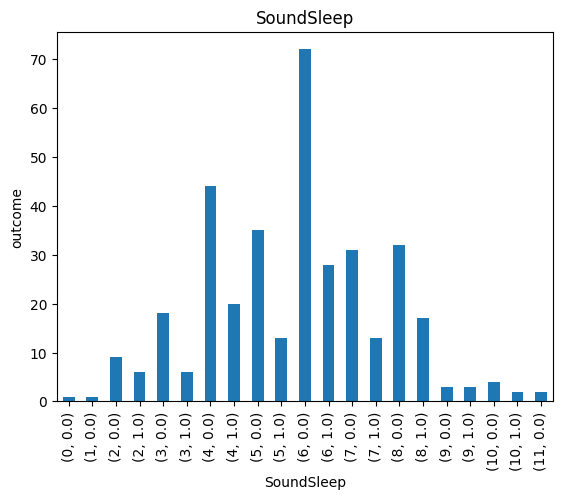

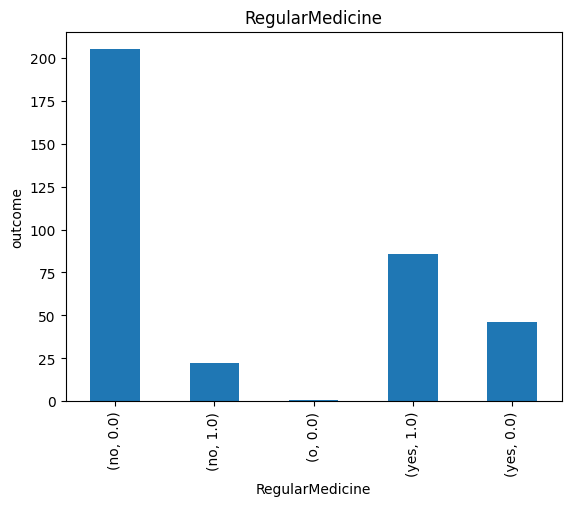

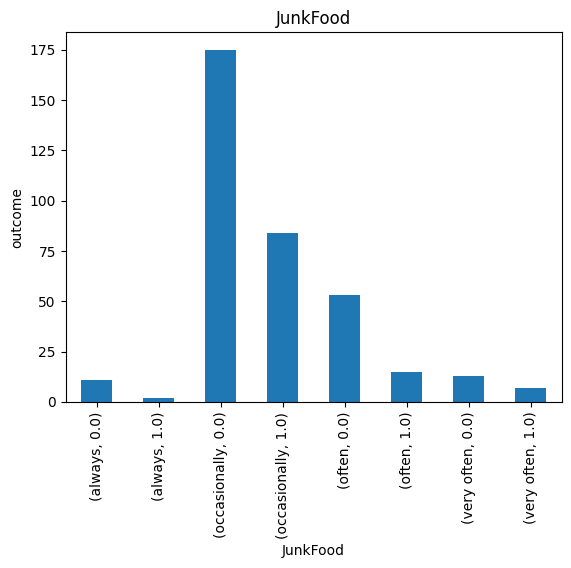

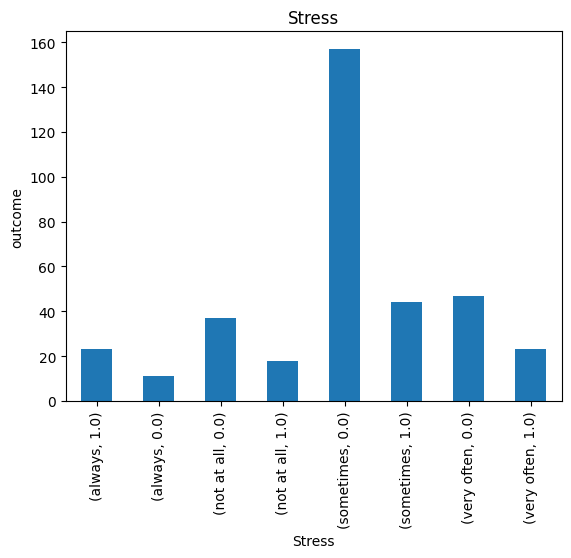

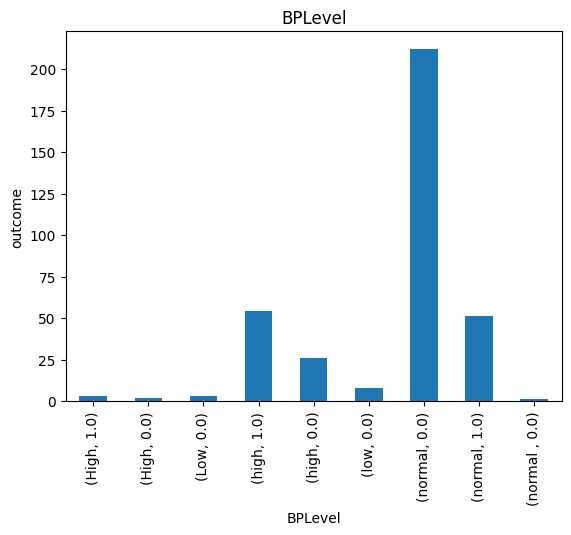

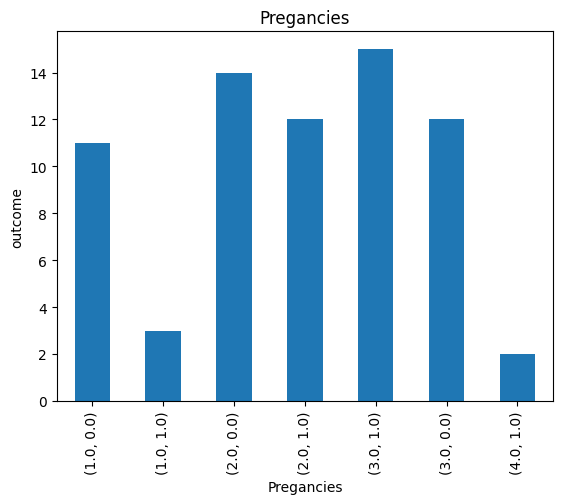

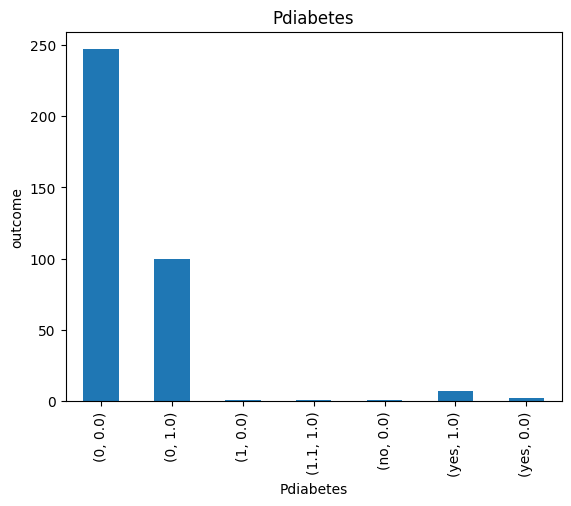

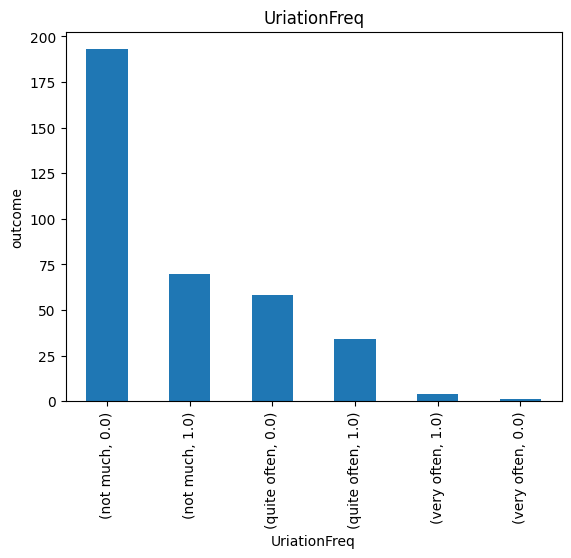

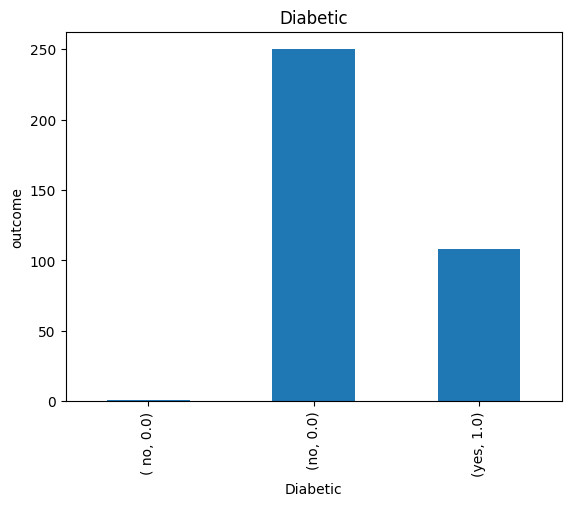

In [13]:
for feature in discrete_columns:
    dt=df_copy.copy()
    dt.groupby(feature)['outcome'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('outcome')
    plt.title(feature)
    plt.show()

In [14]:
df_copy.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,outcome
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,NaN,0,not much,no,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,NaN,0,not much,no,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,NaN,0,not much,no,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,NaN,0,not much,no,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,NaN,0,not much,no,0.0


In [15]:
# Remove any duplicate entry
final_df =df_copy.loc[:,~df_copy.columns.duplicated()]

In [16]:
final_df.shape

(952, 19)

In [17]:
#import the dataset
df = pd.read_csv('diabetes.csv')

Naive Bayes

In [18]:
# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Naive bayes


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()


In [20]:
classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[95 12]
 [18 29]]
0.8051948051948052


Random forest


In [25]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()

n_estimators = [10, 20, 30, 50, 100]
max_depth = [2, 3, 7]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    }
random_cv = RandomizedSearchCV(estimator=clf,param_distributions=hyperparameter_grid,
                               cv=5, n_iter=5,scoring = 'neg_mean_absolute_error',n_jobs = 8,verbose = 5,
                               return_train_score = True,random_state=40)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomForestClassifier(max_depth=7, n_estimators=30)

In [214]:
clf = RandomForestClassifier(max_depth=10, n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [215]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[97 10]
 [16 31]]
0.8311688311688312


Random Forest



In [27]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()

n_estimators = [10, 20, 30, 50, 100]
max_depth = [2, 3, 5, 7, 10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    }
random_cv = RandomizedSearchCV(estimator=clf,param_distributions=hyperparameter_grid,
                               cv=5, n_iter=5,scoring = 'neg_mean_absolute_error',n_jobs = 4,verbose = 5,
                               return_train_score = True,random_state=42)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

TypeError: ignored

In [61]:
clf = RandomForestClassifier(max_depth=10, n_estimators=50)
clf.fit(X_train, y_train)

ValueError: ignored

In [62]:
y_pred = clf.predict(X_test)
y_pred

ValueError: ignored

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[95 12]
 [16 31]]
0.8181818181818182


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[2,3, None],
              "max_features":randint(1,9),
              "min_samples_leaf":randint(1,8),
              "criterion": ["gini", "entropy"]
}

tree_cv = RandomizedSearchCV(classifier, parameters, cv = 5)
tree_cv.fit(X_train, y_train)
tree_cv.best_estimator_

ValueError: ignored

In [108]:
classifier = DecisionTreeClassifier(max_depth=2, max_features=6, min_samples_leaf=7)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=6, min_samples_leaf=7)

In [109]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[93 14]
 [23 24]]
0.7597402597402597


In [ ]:
# Creating a pickle file for the classifier
import pickle
filename = 'diabetes-model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7638436482084691
Test Accuracy of Logistic Regression Model is 0.8181818181818182


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
confusion_matrix(y_test, y_pred)

array([[97, 10],
       [18, 29]])

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [218]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of svc Model is {svc_train_acc}")
print(f"Test Accuracy of svc Model is {svc_test_acc}")

Training Accuracy of svc Model is 0.7654723127035831
Test Accuracy of svc Model is 0.8051948051948052


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [133]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of genetic Model is {sgbc_train_acc}")
print(f"Test Accuracy of genetic Model is {sgbc_test_acc}")

Training Accuracy of genetic Model is 0.9218241042345277
Test Accuracy of genetic Model is 0.8246753246753247


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


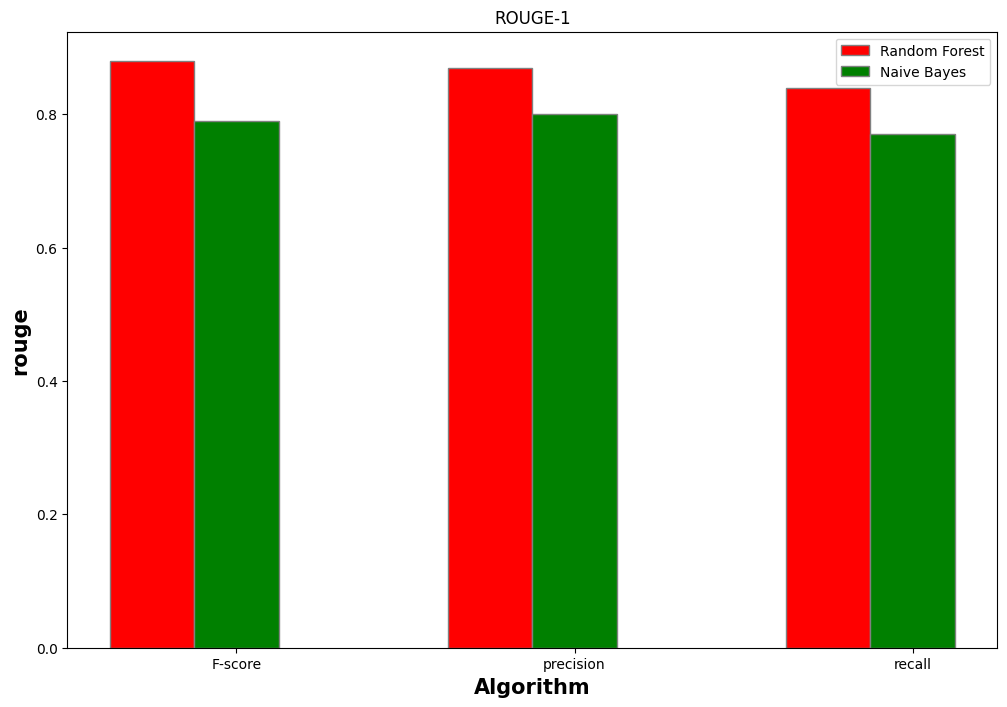

In [139]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Random_Forest = [0.88,0.87,0.84]
Naive_Bayes = [0.79,0.8,0.77]

 
# Set position of bar on X axis
br1 = np.arange(len(Random_Forest))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Random_Forest, color ='r', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br2, Naive_Bayes, color ='g', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
# Adding Xticks
plt.title('ROUGE-1')
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('rouge', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Random_Forest))],
        ['F-score', 'precision', 'recall'])
 
plt.legend()
plt.show()


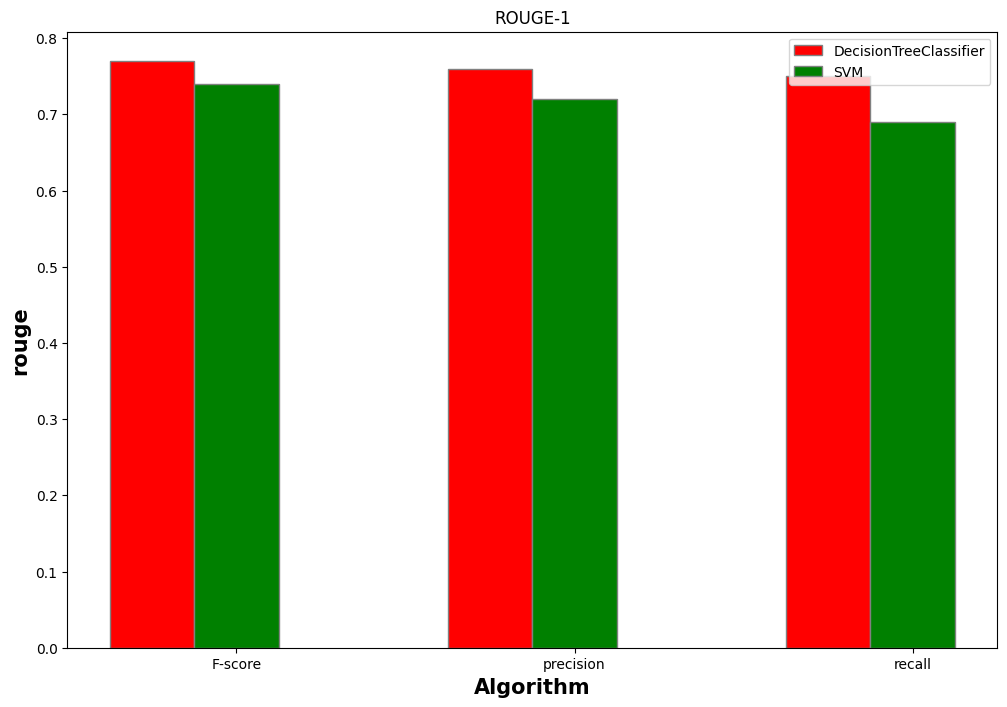

In [126]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
DecisionTreeClassifier = [0.77,0.76,0.75]
SVM = [0.74,0.72,0.69]

 
# Set position of bar on X axis
br1 = np.arange(len(Random_Forest))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, DecisionTreeClassifier, color ='r', width = barWidth,
        edgecolor ='grey', label ='DecisionTreeClassifier')
plt.bar(br2, SVM, color ='g', width = barWidth,
        edgecolor ='grey', label ='SVM')
# Adding Xticks
plt.title('ROUGE-1')
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('rouge', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(DecisionTreeClassifier))],
        ['F-score', 'precision', 'recall'])
 
plt.legend()
plt.show()

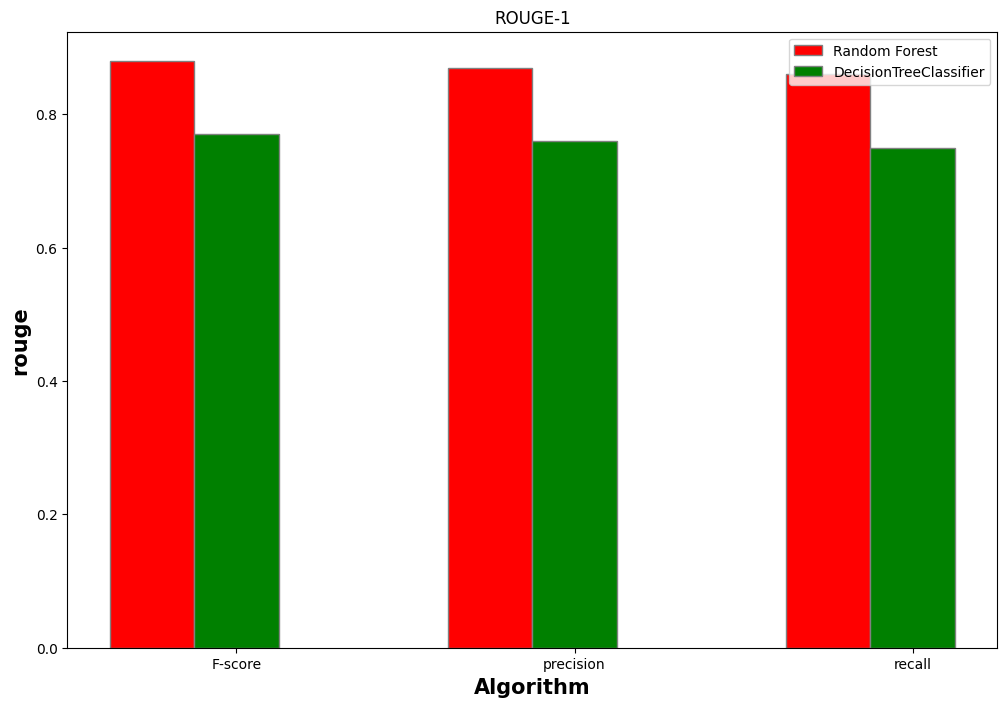

In [137]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Random_Forest = [0.88,0.87,0.86]
DecisionTreeClassifier = [0.77,0.76,0.75]

 
# Set position of bar on X axis
br1 = np.arange(len(Random_Forest))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Random_Forest, color ='r', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br2, DecisionTreeClassifier, color ='g', width = barWidth,
        edgecolor ='grey', label ='DecisionTreeClassifier')
# Adding Xticks
plt.title('ROUGE-1')
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('rouge', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Random_Forest))],
        ['F-score', 'precision', 'recall'])
 
plt.legend()
plt.show()


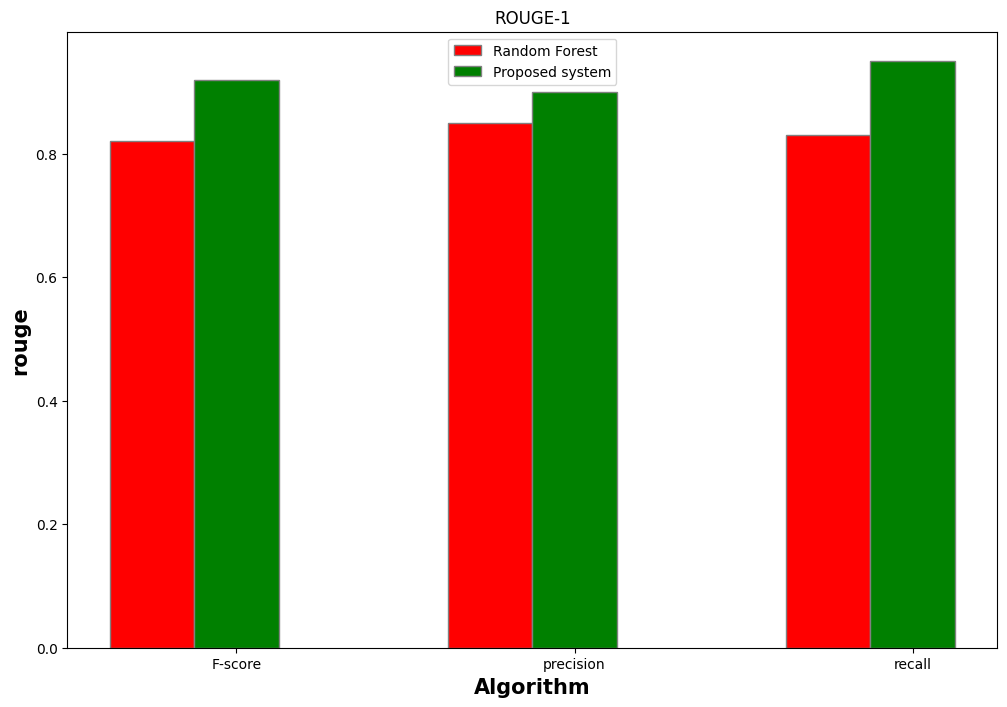

In [130]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Random_Forest = [0.82,0.85,0.83]
Proposed_system = [0.92,0.90,0.95]

 
# Set position of bar on X axis
br1 = np.arange(len(Random_Forest))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Random_Forest, color ='r', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br2, Proposed_system, color ='g', width = barWidth,
        edgecolor ='grey', label ='Proposed system')
# Adding Xticks
plt.title('ROUGE-1')
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('rouge', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Random_Forest))],
        ['F-score', 'precision', 'recall'])
 
plt.legend()
plt.show()